In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/your_data.csv')
data.head

<bound method NDFrame.head of         Unnamed: 0  systolic  fasting blood sugar  AST  dental caries  Gtp  \
0                0       135                   94   22              0   27   
1                1       146                  147   27              1   37   
2                2       118                   79   27              0   53   
3                3       131                   91   20              1   30   
4                4       121                   91   19              0   17   
...            ...       ...                  ...  ...            ...  ...   
159251      159251       127                   64   25              0   13   
159252      159252       120                   89   21              0   18   
159253      159253       114                   84   15              0   12   
159254      159254       121                  122   22              0   37   
159255      159255       125                   83   21              0   17   

        hemoglobin  serum creatin

In [4]:
data = data.rename(columns={'Unnamed: 0': 'id'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   systolic             159256 non-null  int64  
 2   fasting blood sugar  159256 non-null  int64  
 3   AST                  159256 non-null  int64  
 4   dental caries        159256 non-null  int64  
 5   Gtp                  159256 non-null  int64  
 6   hemoglobin           159256 non-null  float64
 7   serum creatinine     159256 non-null  float64
 8   age                  159256 non-null  int64  
 9   height(cm)           159256 non-null  int64  
 10  triglyceride         159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB


In [6]:
target_variable = 'smoking'

**Univariate Analysis**

count    159256.000000
mean        122.503648
std          12.729315
min          77.000000
25%         114.000000
50%         121.000000
75%         130.000000
max         213.000000
Name: systolic, dtype: float64


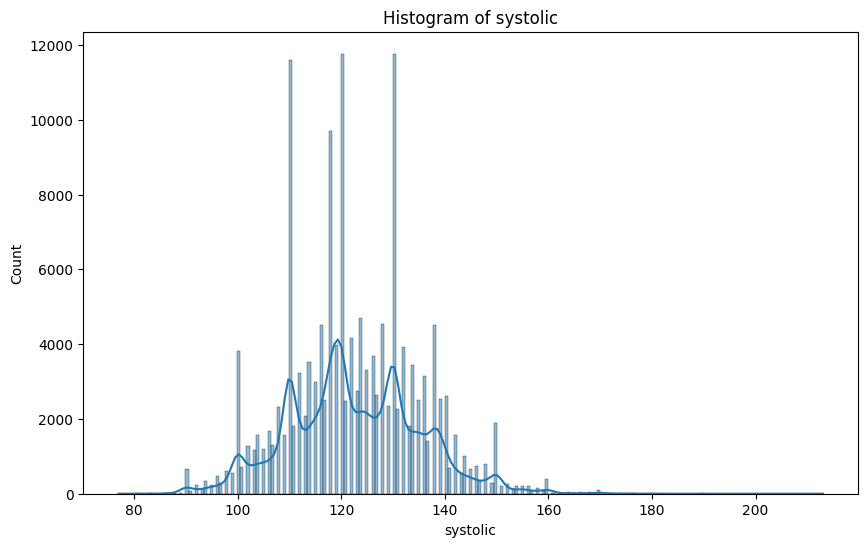

count    159256.000000
mean         98.352552
std          15.329740
min          46.000000
25%          90.000000
50%          96.000000
75%         103.000000
max         375.000000
Name: fasting blood sugar, dtype: float64


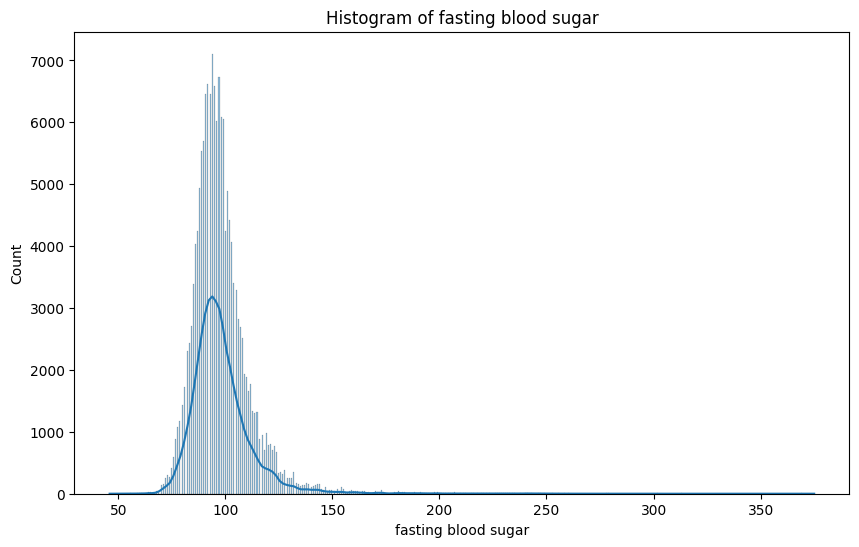

count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64


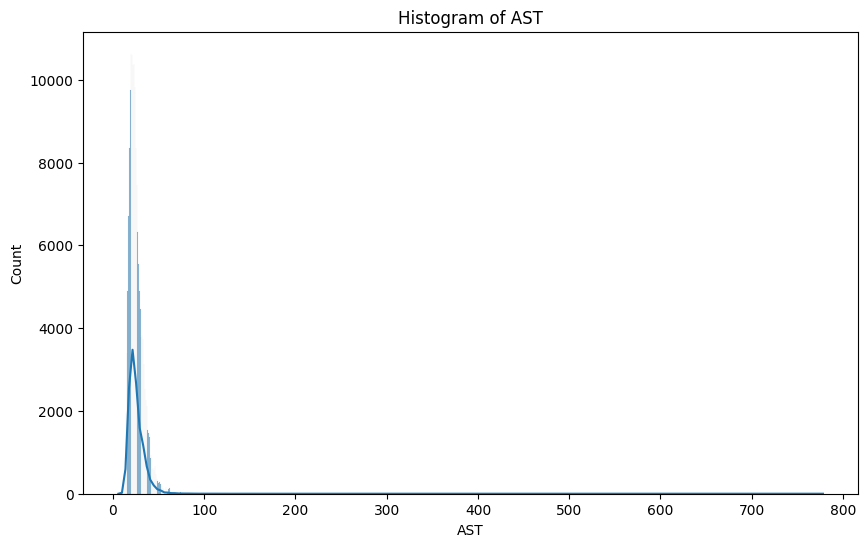

count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64


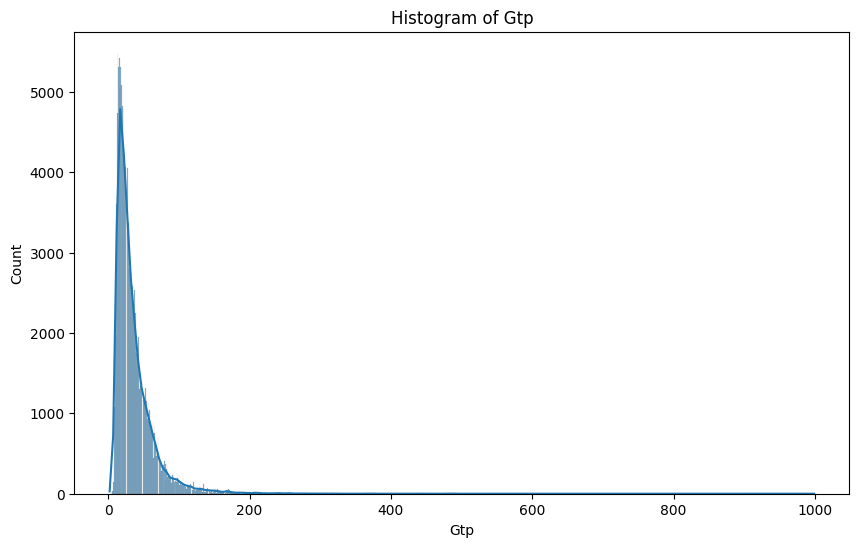

count    159256.000000
mean         14.796965
std           1.431213
min           4.900000
25%          13.800000
50%          15.000000
75%          15.800000
max          21.000000
Name: hemoglobin, dtype: float64


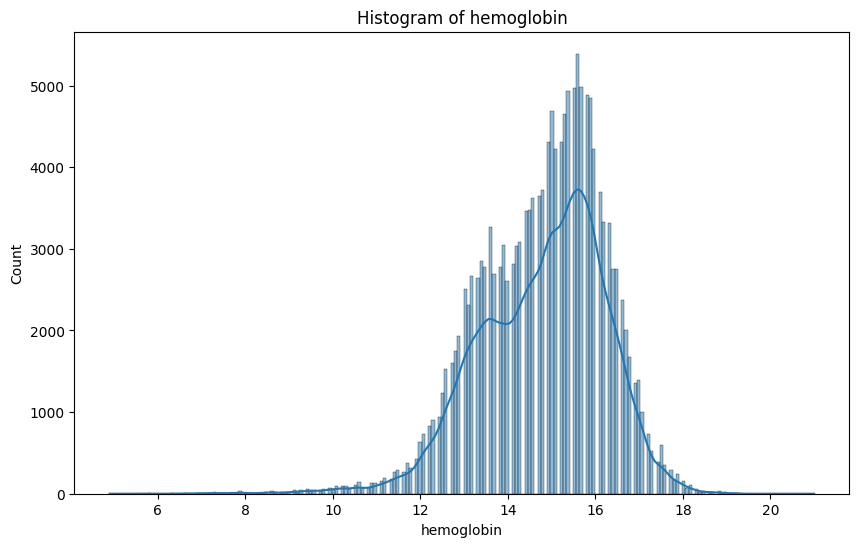

count    159256.000000
mean          0.892764
std           0.179346
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64


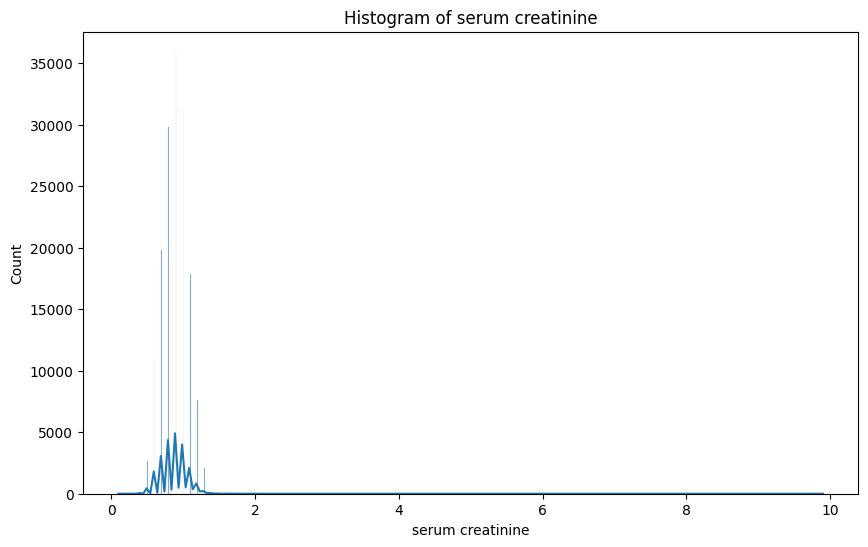

count    159256.000000
mean         44.306626
std          11.842286
min          20.000000
25%          40.000000
50%          40.000000
75%          55.000000
max          85.000000
Name: age, dtype: float64


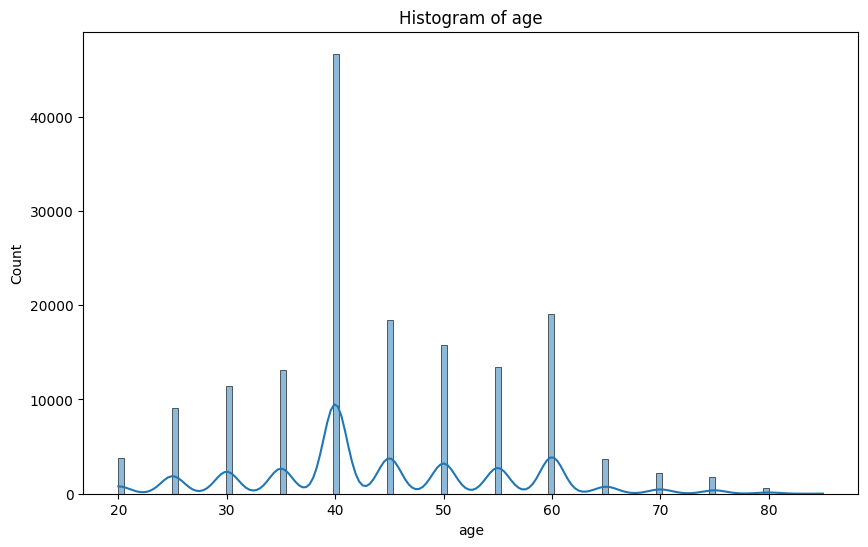

count    159256.000000
mean        165.266929
std           8.818970
min         135.000000
25%         160.000000
50%         165.000000
75%         170.000000
max         190.000000
Name: height(cm), dtype: float64


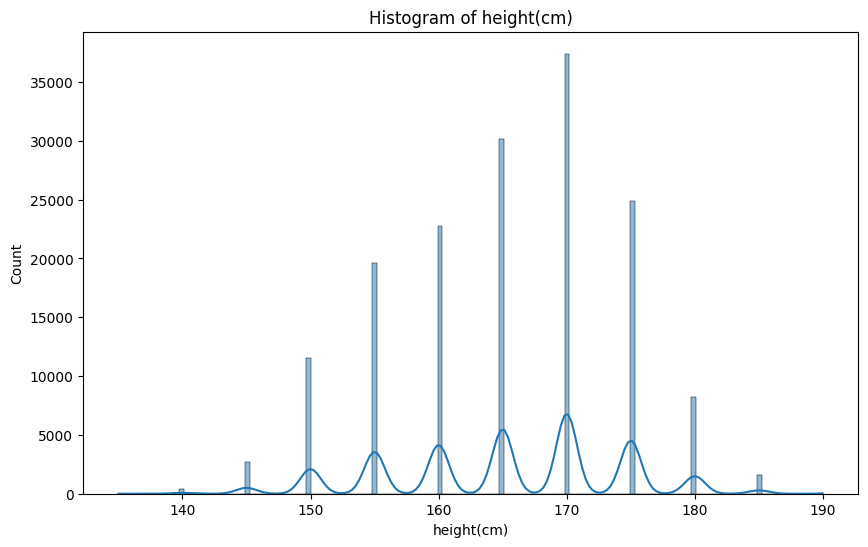

count    159256.000000
mean        127.616046
std          66.188989
min           8.000000
25%          77.000000
50%         115.000000
75%         165.000000
max         766.000000
Name: triglyceride, dtype: float64


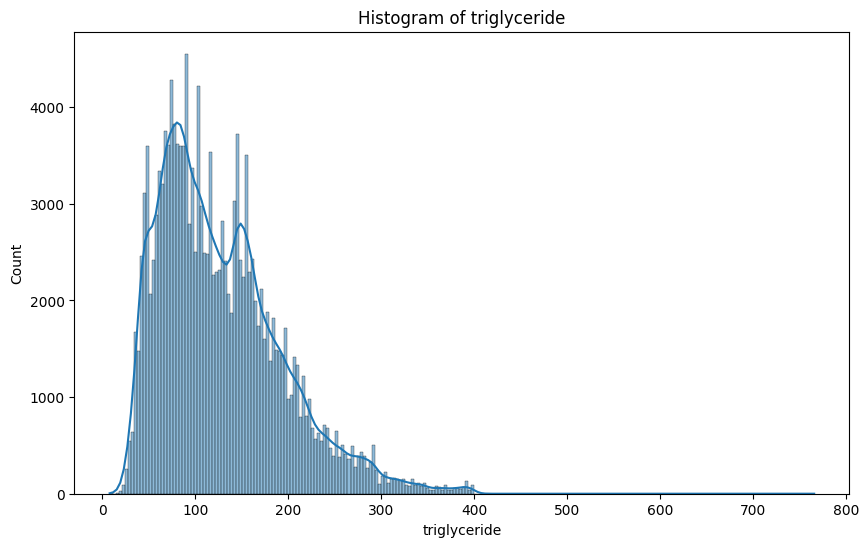

0    127724
1     31532
Name: dental caries, dtype: int64


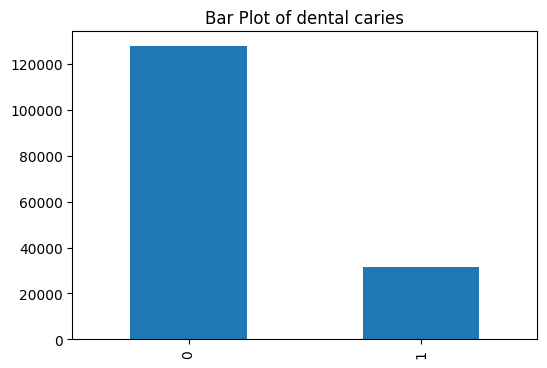

In [7]:
# For continues variables
numerical_features=['systolic','fasting blood sugar','AST','Gtp','hemoglobin','serum creatinine','age','height(cm)','triglyceride']

for var in numerical_features:

  print(data[var].describe())

  # Histogram
  plt.figure(figsize=(10, 6))
  sns.histplot(data[var], kde=True)
  plt.title('Histogram of {}'.format(var))
  plt.show()

# For categorical variable
categorical_features = 'dental caries'
print(data[categorical_features].value_counts())

# Bar chart
plt.figure(figsize=(6, 4))
data[categorical_features].value_counts().plot(kind='bar', stacked=True)
plt.title('Bar Plot of {}'.format(categorical_features))
plt.show()



Bivariate Analysis

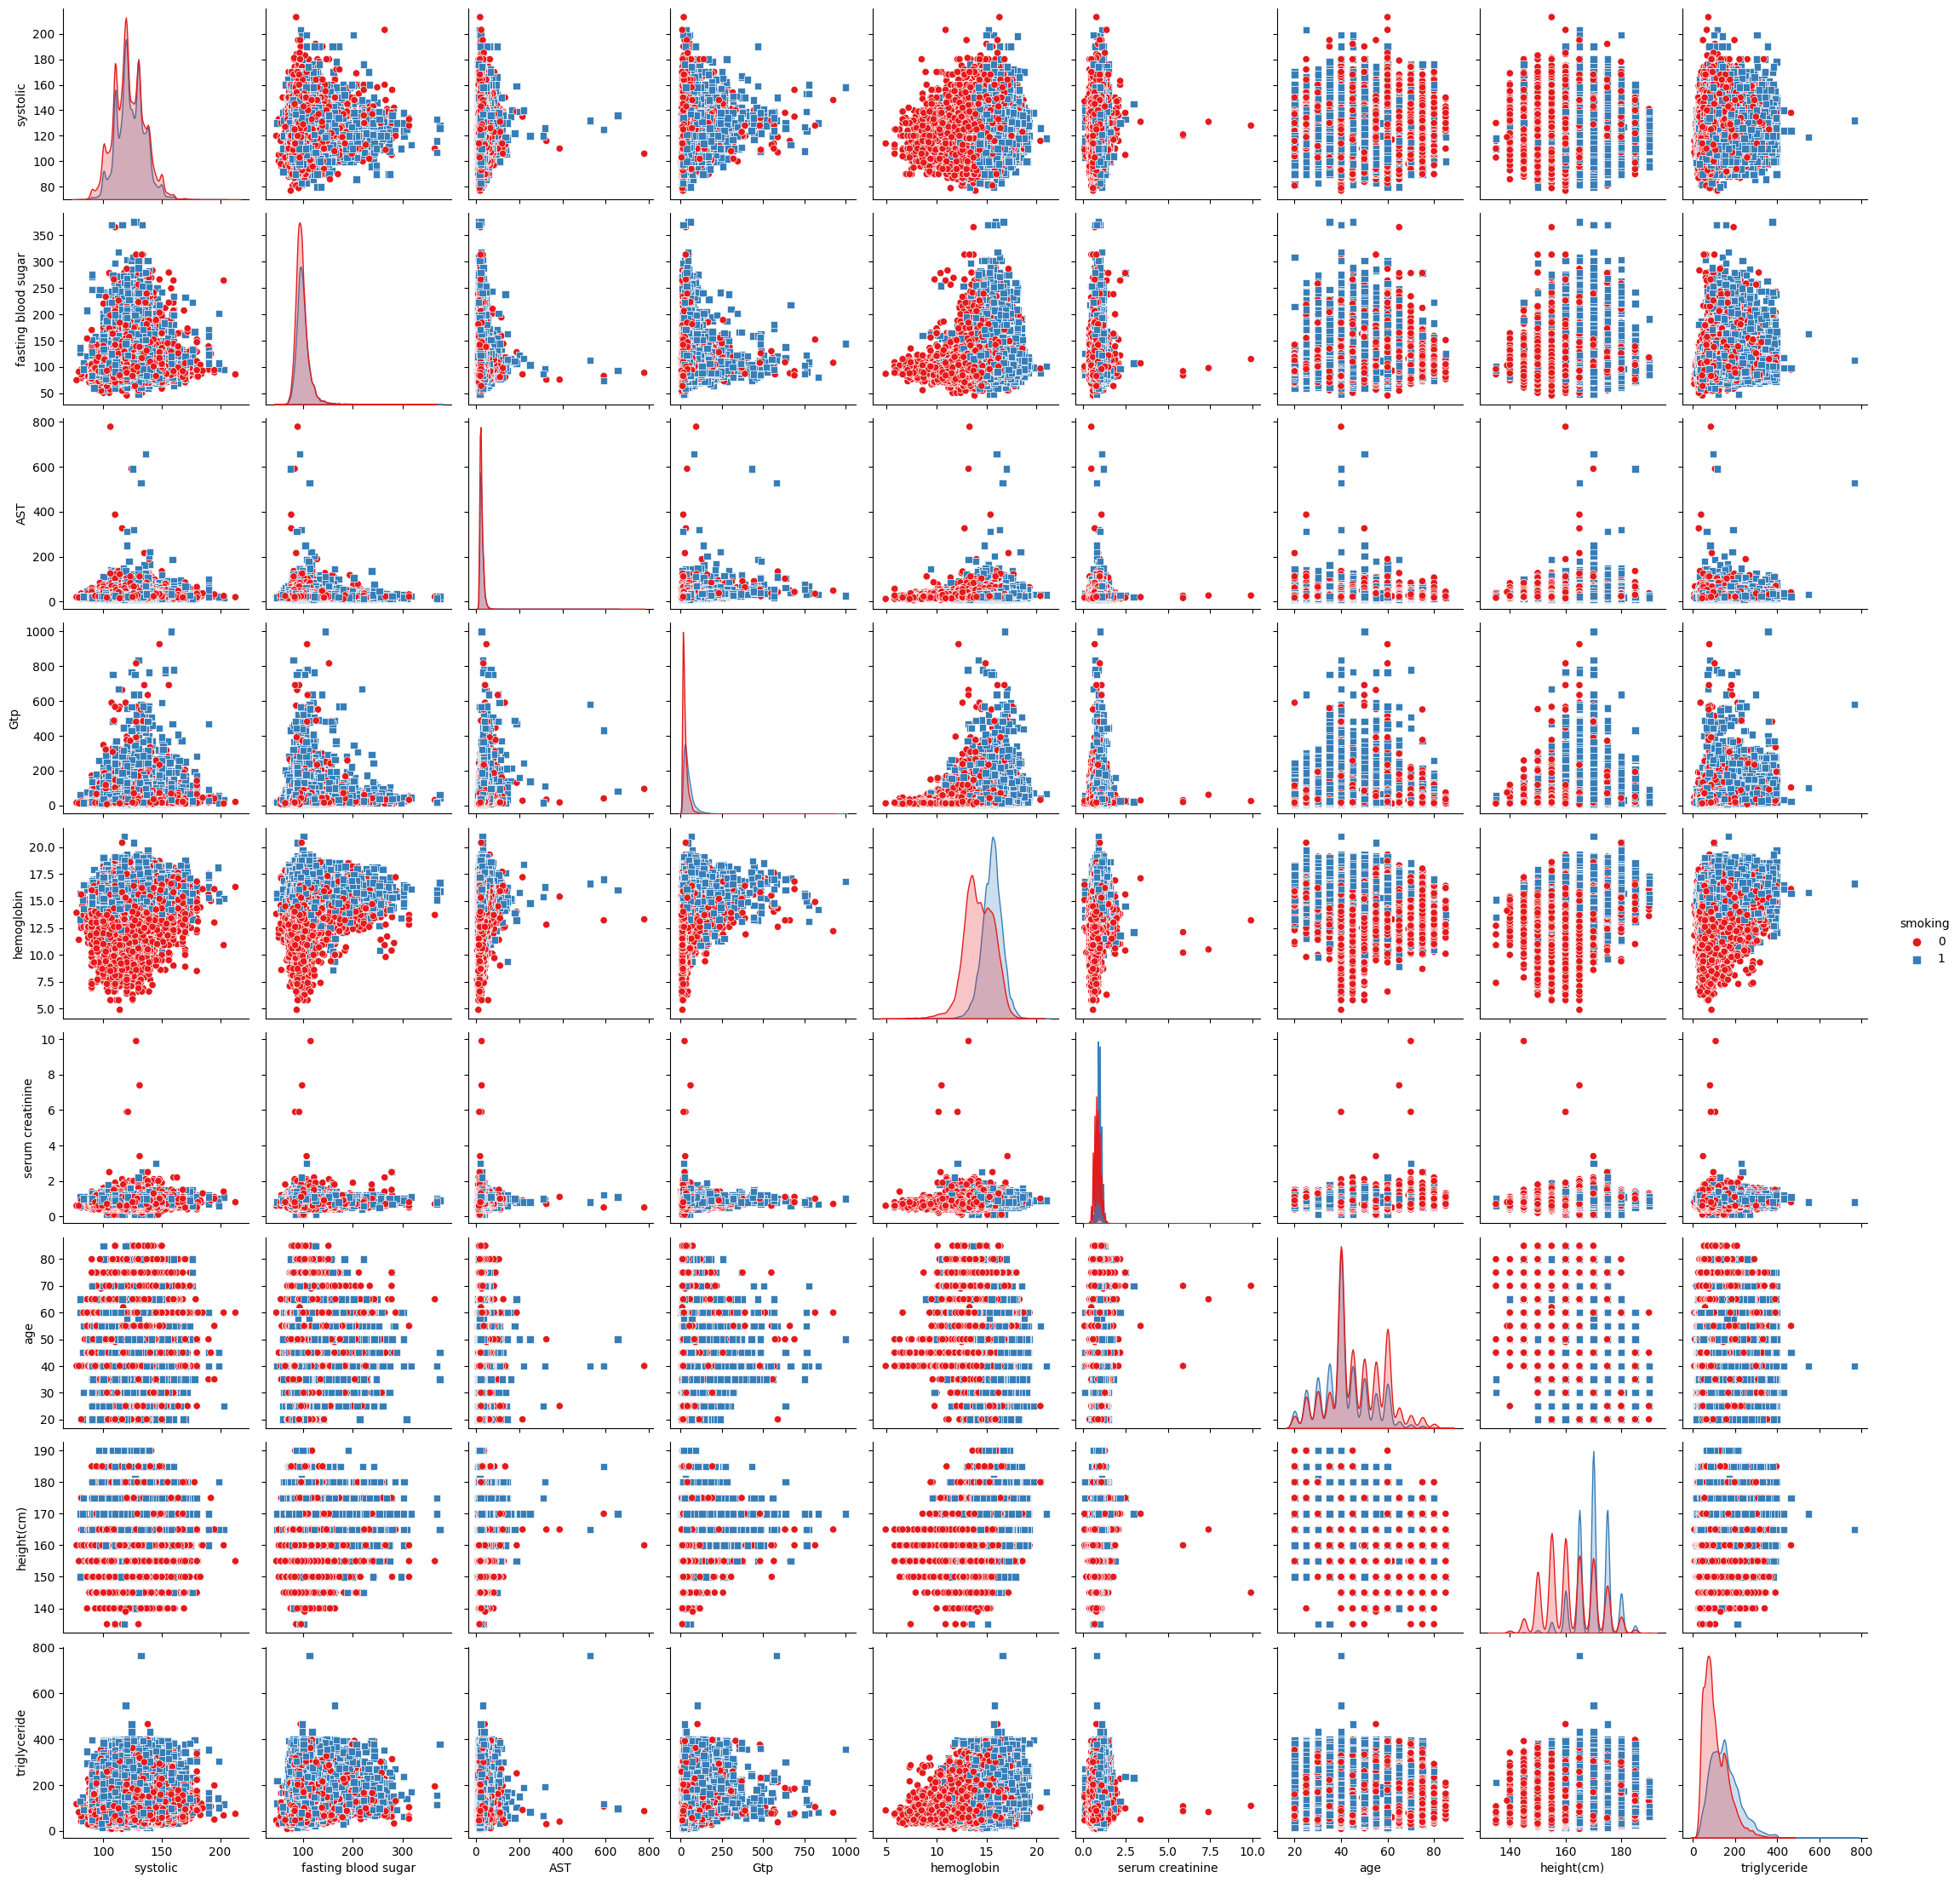

In [8]:
# Pairplot for numerical features
sns.pairplot(data, hue=target_variable, palette='Set1', markers=["o", "s"], vars=numerical_features)
plt.show()

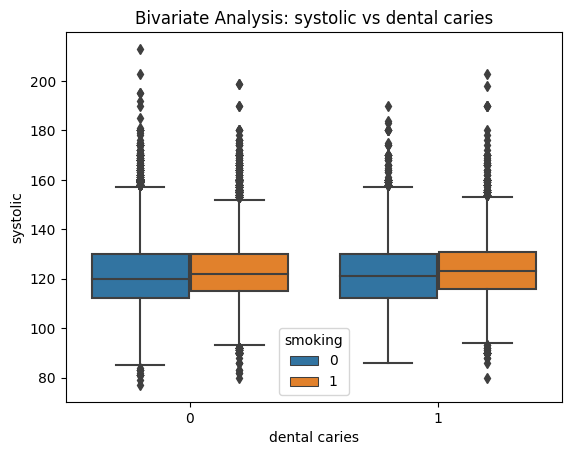

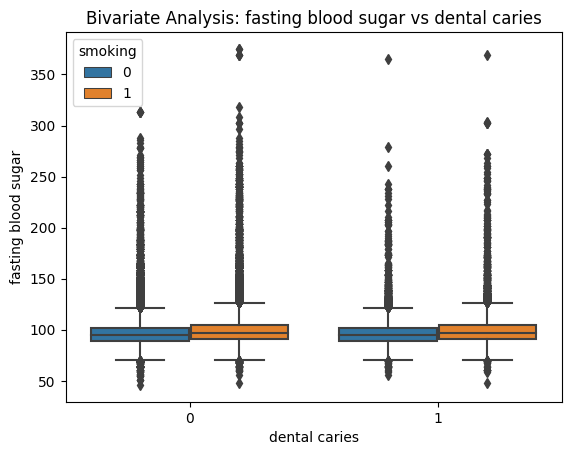

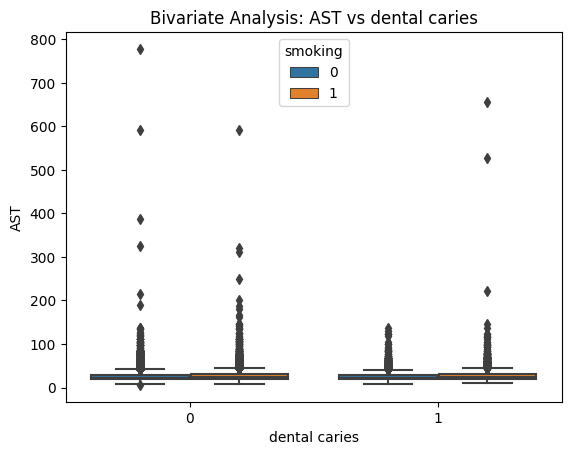

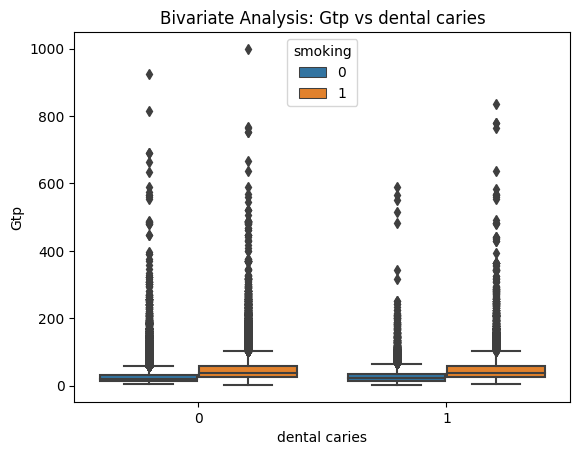

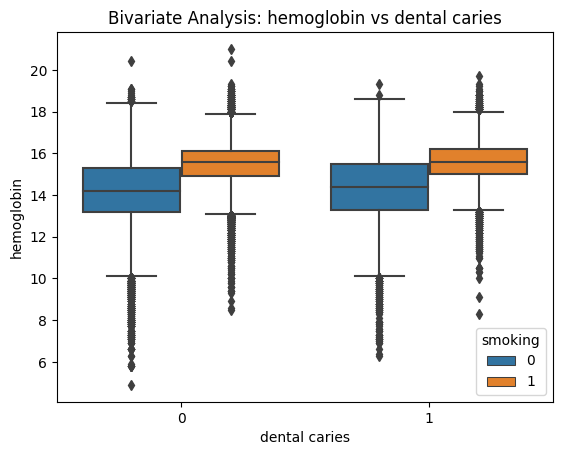

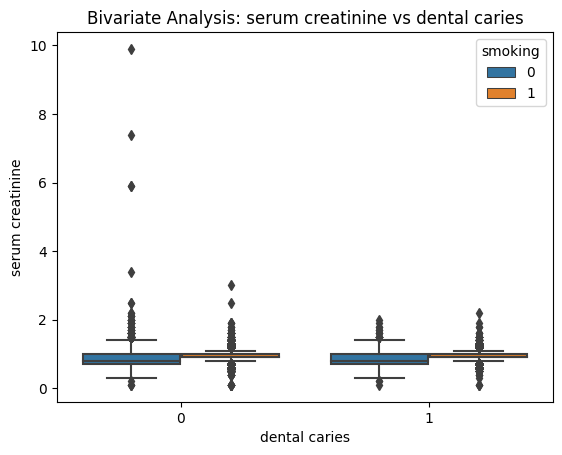

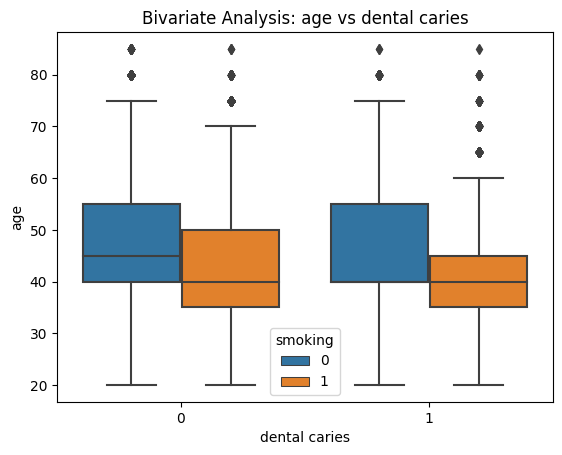

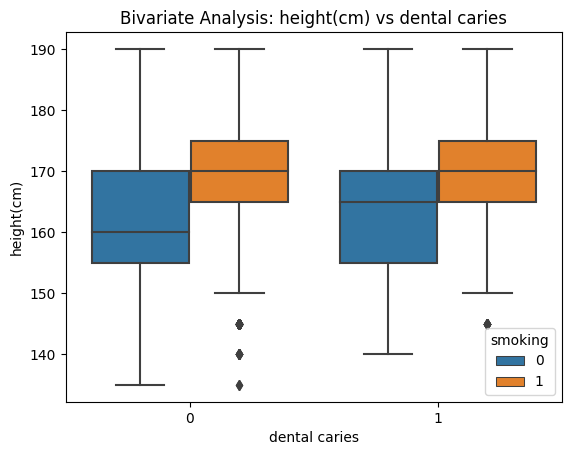

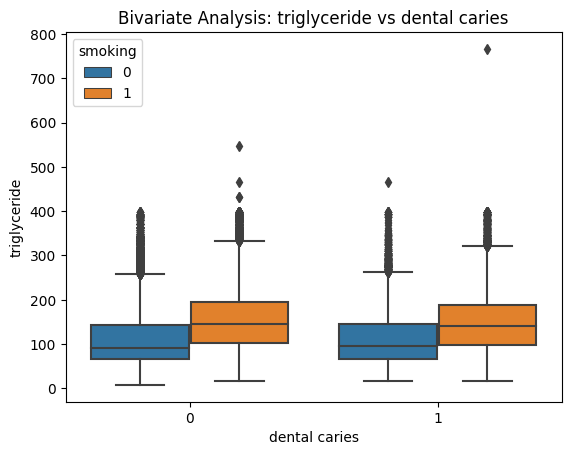

In [9]:
# Box plots for numerical features vs categorical feature
for num_feature in numerical_features:
    sns.boxplot(x=categorical_features, y=num_feature, hue=target_variable, data=data)
    plt.title(f'Bivariate Analysis: {num_feature} vs {categorical_features}')
    plt.show()

**Multivariate Analysis**

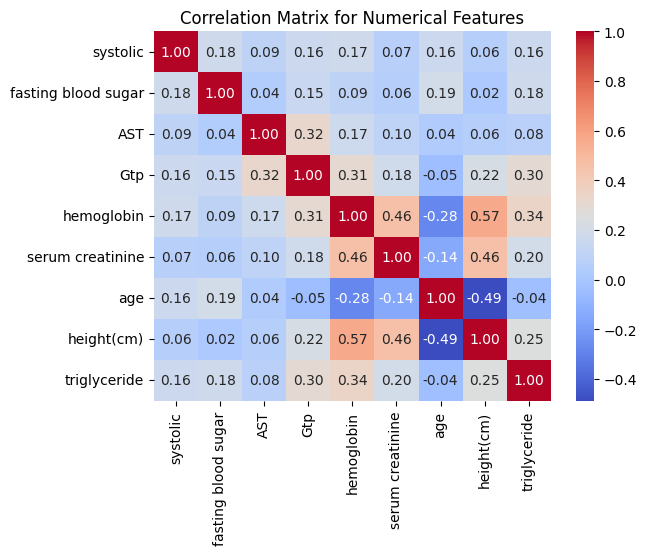

Correlation with Categorical Feature:
id                    -0.001382
systolic               0.018136
fasting blood sugar   -0.000463
AST                   -0.004542
dental caries          1.000000
Gtp                    0.048876
hemoglobin             0.077104
serum creatinine       0.031881
age                   -0.120556
height(cm)             0.100585
triglyceride           0.031098
smoking                0.106636
dtype: float64


In [10]:
#Correlation Analysis
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()
correlation_with_categorical = data.apply(lambda x: x.corr(data[categorical_features]))
print("Correlation with Categorical Feature:")
print(correlation_with_categorical)